## Data Exploration - Multivariate

Within this section I will complete the EDA specifically relating to multivariate analysis. Multivariate analysis is 
analysis involving two or more variables. It is important to note that the a few of the EDA steps I completed under the univariate tab. I will always link when mentioned. 

## Data Understanding and Descriptive Statistics

To see the analysis created for data understanding and descriptive statistics follow this link [here](univariate.ipynb). This analysis was created under the univariate tab.

## Data Visualization

**Scatter Plot for Inventions and Marine Protected Area**

This scatterplot shows the correlation between inventions and marine protected area. As you can see, there seems to be little to no correlation between these two variables.

/Users/kendallgilbert/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


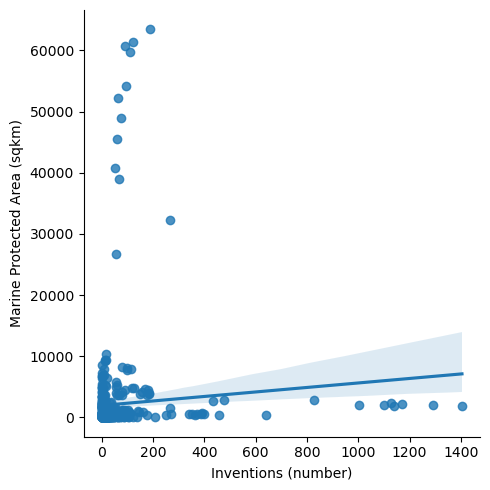

In [11]:
#| code-fold: true

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Importing Data
merged = pd.read_csv("/Users/kendallgilbert/dsan-5000-project-kendallgilbert180/dsan-website/5000-website/data/01-modified-data/merged.csv")

#Seaborn Scatter Plot
sns.lmplot(
    data=merged, 
    x="Inventions (number)",
    y="Marine Protected Area (sqkm)"
    )


**Scatterplot for Marine Protected Area and Fishing Exports**

Different than the scatterplot shown above, there seems to be a slight correlation for marine protected area. As marine protected area increases, so does fishing exports. This makes sense as cleaner oceans results in an abundance of marine life. 

/Users/kendallgilbert/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


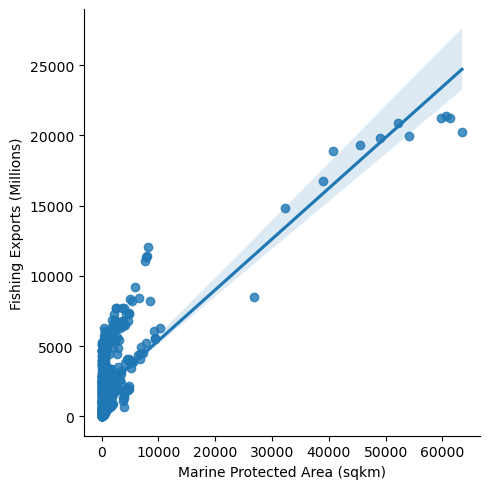

In [12]:
#| code-fold: true 
sns.lmplot(
    data=merged, 
    x="Marine Protected Area (sqkm)",
    y="Fishing Exports (Millions)"
    )
plt.show()

**Scatterplot for Instruments and Aquaculture Production**

This scatterplot shows that their is no correlation between policy instruments and aquaculture production. 

/Users/kendallgilbert/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


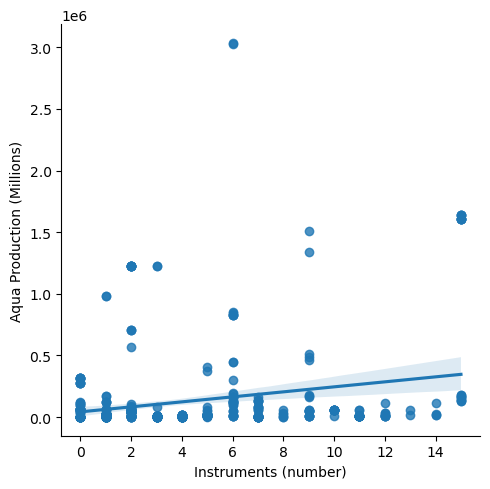

In [13]:
#| code-fold: true 
sns.lmplot(
    data=merged, 
    x="Instruments (number)",
    y="Aqua Production (Millions)"
    )
plt.show()

## Correlation Analysis

Correlation analysis is completed in order to understand if there is a relationship between variables. Below, I have used the pearson correlation to shows the correlations between variables. The pearson correlation is the most common way of measuring linear relationships between variables within a dataset. 


**Pearson Correlations**

In [14]:
#| code-fold: true
pearson_correlation = (merged.corr(method='pearson', numeric_only=True))
pearson_correlation

,Aqua Production (Millions),Marine Protected Area (sqkm),Inventions (number),Instruments (number),Fishing Exports (Millions),Year
Aqua Production (Millions),1.000000,-0.030435,0.150861,0.227669,0.027313,0.162511
Marine Protected Area (sqkm),-0.030435,1.000000,0.074908,-0.108633,0.827048,0.065446
Inventions (number),0.150861,0.074908,1.000000,0.081545,0.113523,0.041807
Instruments (number),0.227669,-0.108633,0.081545,1.000000,0.061151,0.110750
Fishing Exports (Millions),0.027313,0.827048,0.113523,0.061151,1.000000,0.110683
Year,0.162511,0.065446,0.041807,0.110750,0.110683,1.000000


Immediately, we can see that there a very small correlation within this dataset. A majority of the correlations are extremely close to 0 meaning NO correlation and some are negative meaning they have a negative correlation. Although, there is one correlations that seem to stand out. This is the correlation between Fishing Exports and Marine Protected Area (0.8). To see the scatter plot between these two variables scroll up!

Correlations are important to pay attention to as they can guide variable selection in machine learning. For example, I may not want to use variables with high correlations because they could lead to overfitting. 

**Pairplots** 

This pairplot is another way to create scatterplot between all the variables as well as univariate histograms. It helps us explore all the relationships and make sure we have not missed any crucial relationships. 

/Users/kendallgilbert/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


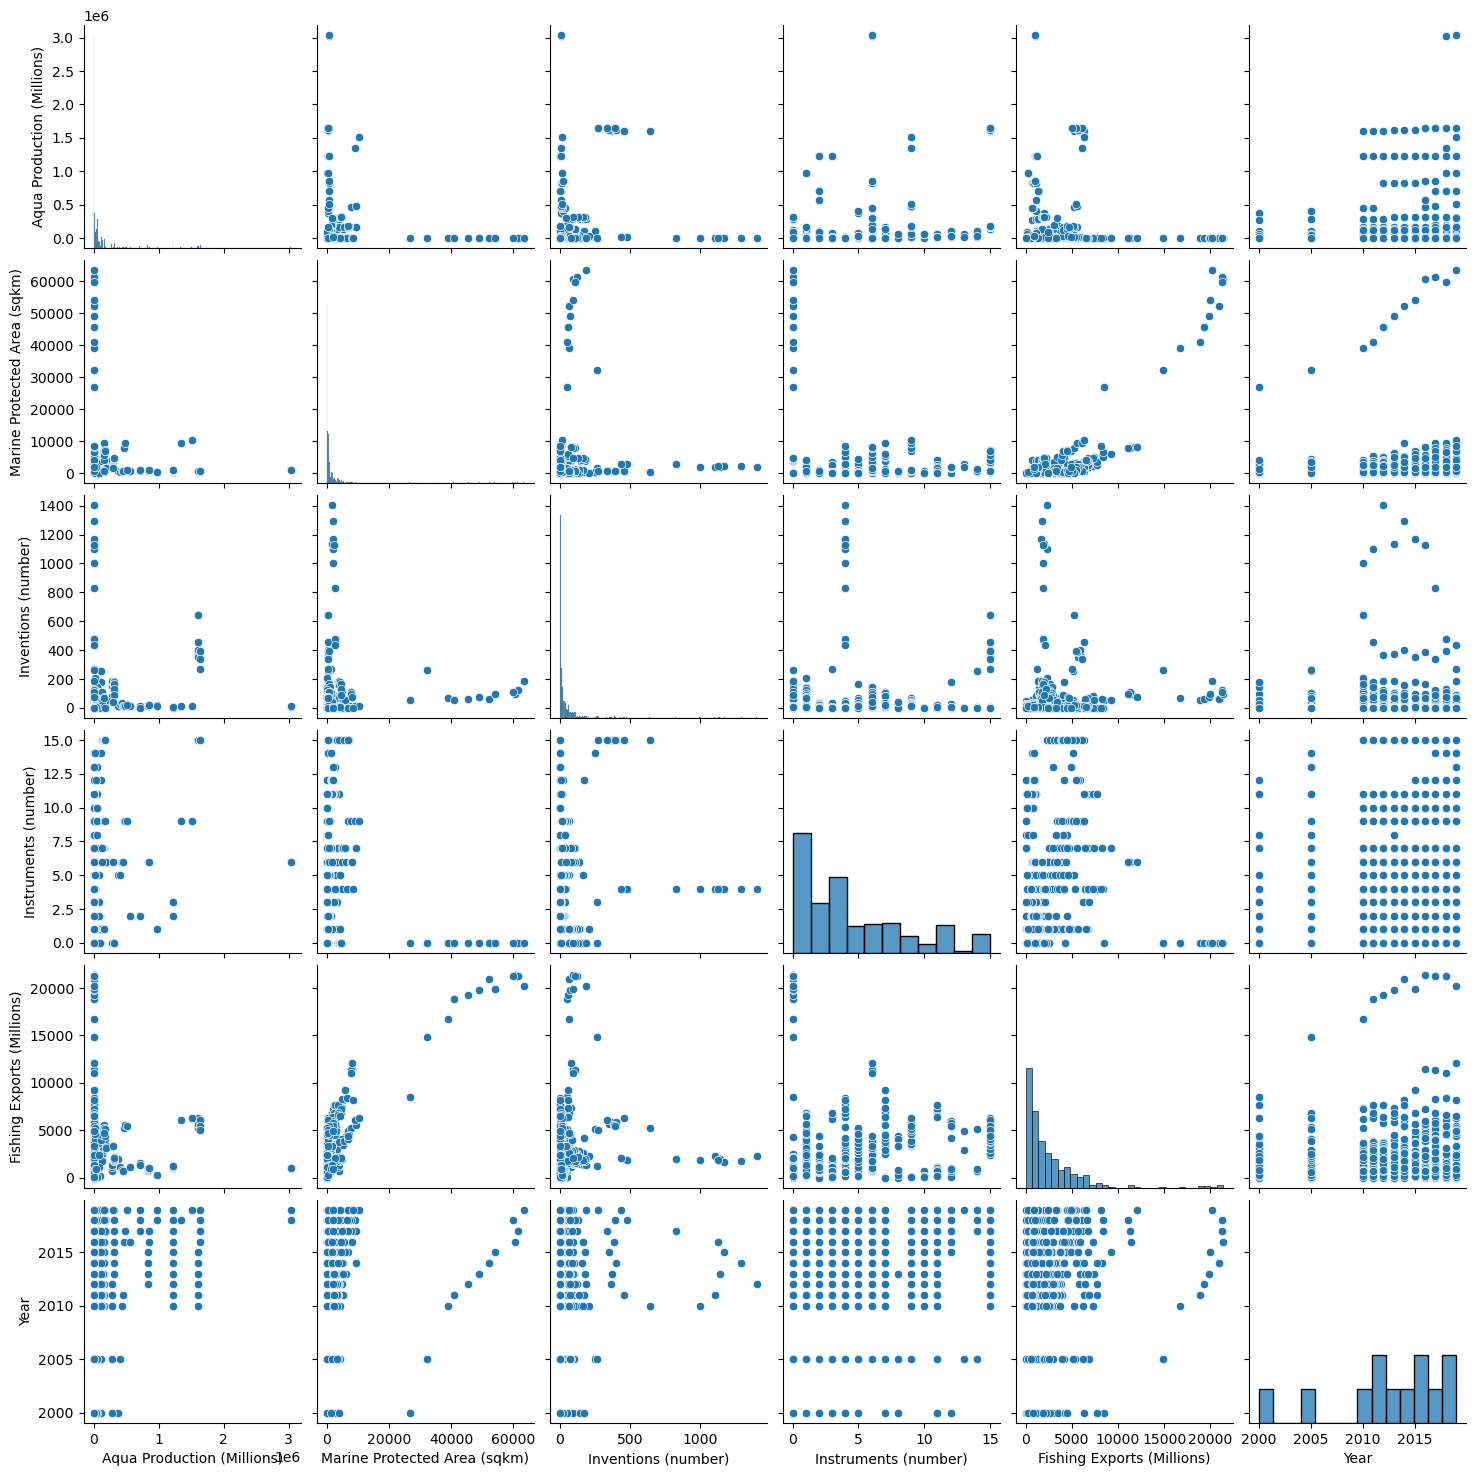

In [15]:
sns.pairplot(merged)
plt.show()

## Outliers

There seem to be outliers and they can easily be seen in the scatterplots created above. The first outlier I want to look into is the high value in aqua-culture production.

Highest value: (15.0, 3036163.0)


/Users/kendallgilbert/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


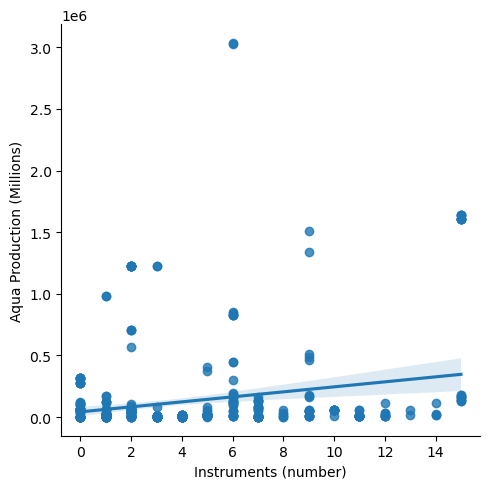

In [24]:
# Aquaculture Scatterplot to find outlier. 
sns.lmplot(
    data=merged, 
    x="Instruments (number)",
    y="Aqua Production (Millions)"
)
highest_x = merged["Instruments (number)"].max()
highest_y = merged["Aqua Production (Millions)"].max()
print("Highest value: ({}, {})".format(highest_x, highest_y))



In [19]:
# Finding Out what is causing this outlier
desired_y = 3036163.0
desired_rows = merged[merged["Aqua Production (Millions)"] == desired_y]
print(desired_rows)

     Aqua Production (Millions)  Marine Protected Area (sqkm)  \
473                   3036163.0                        889.75   

     Inventions (number)  Instruments (number)  Fishing Exports (Millions)  \
473                10.08                   6.0                     1059.83   

       Country  Year  
473  Australia  2019  


This outlier comes from Australias aquaculture production in 2019! After doing a little research I learned that the market size of the Aquaculture industry in Australia is measured at $2.7bn. You can find more about Australia's aquaculture industry [here!](https://www.agriculture.gov.au/agriculture-land/fisheries/aquaculture/aquaculture-industry-in-australia)

## Methods and Findings

Overall this multivariate analysis helped me understand relationships between variables within this dataset. It can be understood that there aren't many strong correlations. Although, it is interesting to pay attention to the relationships that do exist like marine protected area and fishing exports. This relationship makes sense as cleaner water would result in an abundance of fish leading to higher fishing exports.

Overall, this univariate and multivariate data analysis helped me understand that this data set has the potential to 
display the need for ocean sustainability in addition to what is being done and how it has helped so far.

By the end of the project, I believe the variables within this dataset will act a tool for organizations, local governments and developers to refence in regards to understanding ocean sustainability and taking action towards more ocean sustainability. 

For example, a local official could see trends within a country with an increase in MPA and see what variables have helped this result as well as what has come from this increase in MPA. 
